In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
import os
from pandas_profiling import ProfileReport

In [4]:
# os.getcwd()

In [3]:
df = pd.read_csv("..\data\\raw\\train_data.txt", header = None)
print(df.head())

   0      1         2      3      4      5       6      7      8      9   ...  \
0   1  1.488  0.000090  0.900  0.794  2.699   8.334  0.779  4.517  4.609  ...   
1   1  0.728  0.000038  0.353  0.376  1.059   5.864  0.642  2.058  3.180  ...   
2   1  1.220  0.000074  0.732  0.670  2.196   8.719  0.875  4.347  5.166  ...   
3   1  2.502  0.000123  1.156  1.634  3.469  13.513  1.273  5.263  8.771  ...   
4   1  3.509  0.000167  1.715  1.539  5.145   9.112  1.040  3.102  4.927  ...   

        19    20    21        22        23      24  25      26  27  28  
0  187.576   160   159  0.006065  0.000416   0.000   0   0.000  23   1  
1  234.505   170   169  0.005181  0.000403   2.247   0   0.000  23   1  
2  211.442  1431  1427  0.006071  0.000474  10.656   1   0.178  23   1  
3  220.230    94    92  0.004910  0.000320   0.000   0   0.000  23   1  
4  225.162   117   114  0.004757  0.000380  18.182   1  13.318  23   1  

[5 rows x 29 columns]


In [13]:
df2 = df.drop([0,22,27,28], axis = 1)
df2

,1,2,3,4,5,6,7,8,9,10,...,16,17,18,19,20,21,23,24,25,26
0,1.488,0.000090,0.900,0.794,2.699,8.334,0.779,4.517,4.609,6.802,...,164.781,10.421,142.229,187.576,160,159,0.000416,0.000,0,0.000
1,0.728,0.000038,0.353,0.376,1.059,5.864,0.642,2.058,3.180,7.194,...,193.289,14.773,159.515,234.505,170,169,0.000403,2.247,0,0.000
2,1.220,0.000074,0.732,0.670,2.196,8.719,0.875,4.347,5.166,7.548,...,164.768,12.981,146.445,211.442,1431,1427,0.000474,10.656,1,0.178
3,2.502,0.000123,1.156,1.634,3.469,13.513,1.273,5.263,8.771,16.779,...,203.471,10.853,182.713,220.230,94,92,0.000320,0.000,0,0.000
4,3.509,0.000167,1.715,1.539,5.145,9.112,1.040,3.102,4.927,12.823,...,208.440,11.499,182.821,225.162,117,114,0.000380,18.182,1,13.318
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1035,5.127,0.000398,2.721,2.510,8.162,9.846,0.965,4.593,6.806,8.303,...,130.350,14.387,96.145,158.591,63,60,0.001066,24.194,2,15.113
1036,1.757,0.000133,0.808,0.690,2.425,7.571,0.740,2.720,3.927,11.928,...,132.244,7.140,121.490,143.797,47,44,0.000430,46.053,1,25.792
1037,2.912,0.000226,1.141,1.266,3.423,15.489,1.456,6.433,10.138,14.239,...,128.388,13.593,95.921,149.641,79,77,0.000881,20.000,1,4.574
1038,3.788,0.000275,1.786,1.484,5.359,15.702,1.367,6.374,11.094,18.818,...,135.943,46.764,90.051,451.366,75,70,0.001714,16.667,3,19.575


In [14]:
pf = ProfileReport(df2,explorative=True)
pf.to_widgets()

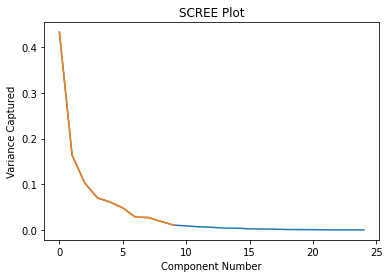

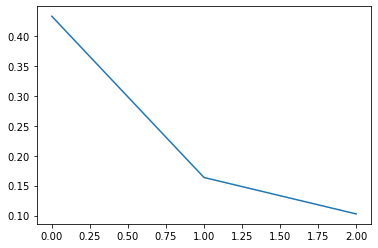

0.7693618648865815
0.699214403748184
0.8786000123282536
             0         1         2         3         4         5
0    -0.475849  0.036366  0.142982 -0.056120 -0.053251 -0.037810
1    -0.660519  0.263583  0.092921 -0.007546 -0.017194  0.023470
2    -0.539432  0.292999  0.118608 -0.159461  0.050811 -0.450969
3    -0.267418  0.051740  0.327392 -0.082964 -0.006847 -0.089589
4    -0.092371  0.133392  0.122079  0.163664 -0.088393 -0.109885
...        ...       ...       ...       ...       ...       ...
1035  0.221095 -0.266983 -0.034831  0.159209 -0.393563 -0.106977
1036 -0.185572 -0.078161 -0.353163  0.249160  0.067818  0.022503
1037 -0.119228 -0.260189  0.032293 -0.093683 -0.034740 -0.027222
1038  0.430049  0.092851 -0.066076 -0.343593 -0.265731 -0.013712
1039 -0.465421 -0.128175 -0.108567  0.037020 -0.088127  0.043181

[1040 rows x 6 columns]


In [16]:
min_max = MinMaxScaler()

df3 = min_max.fit_transform(df2)


pca = PCA()

df2_pca = pca.fit_transform(df3)
plt.plot(pca.explained_variance_ratio_)
plt.xlabel("Component Number")
plt.ylabel("Variance Captured")
plt.title("SCREE Plot")
# plt.show()
plt.savefig("scree_plot.png")
plt.plot(pca.explained_variance_ratio_[0:10])
plt.show()
plt.plot(pca.explained_variance_ratio_[0:3])
plt.show()
print(sum(pca.explained_variance_ratio_[0:4]))
print(sum(pca.explained_variance_ratio_[0:3]))
df4 = pd.DataFrame(df2_pca[:,0:6])
print(sum(pca.explained_variance_ratio_[0:6]))
print(df4)

In [ ]:
df5 = pd.concat([df4, df[28]], axis =1)
df5.head()
print(df4.columns)

In [15]:
for x in df4.columns:
    for y in df4.columns:
        plt.scatter(df5[x], df5[y], marker = ".", c = df5[28], alpha = 0.6)
        plt.show()

NameError: name 'df5' is not defined